In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

KNeighborsClassifier()

0.9566666666666667

In [30]:
y_pred_proba=model.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test.values,y_pred_proba[:,1])
score

0.9877953411606777

In [34]:
model=DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
model.score(X_test,y_test)
score

DecisionTreeClassifier(max_depth=7)

0.982

0.982

In [28]:
grid_search.best_params_

{'max_depth': 7}

In [27]:
#参数调优：网格搜索
from  sklearn.model_selection import GridSearchCV
parameters={"max_depth":[1,3,5,7,9]}  # 树的最大高度
model=DecisionTreeClassifier()
grid_search=GridSearchCV(model,parameters,scoring="roc_auc",cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9]}, scoring='roc_auc')

In [33]:
# roc评估方法
acc=cross_val_score(model,X,y,cv=15,scoring="roc_auc")
acc.mean()

0.9828215700845766

In [32]:
#参数调优 k折交叉验证  ,反复评估模型性能，对过拟合也能直到一定作用
from sklearn.model_selection import cross_val_score
acc=cross_val_score(model,X,y,cv=15)
acc
acc.mean()

array([0.981, 0.986, 0.974, 0.977, 0.98 , 0.973, 0.976, 0.978, 0.976,
       0.988, 0.976, 0.974, 0.984, 0.978, 0.982])

0.9788666666666667

In [23]:
feature=X.columns
importances=model.feature_importances_
#以2维结构表形式
importances_df=pd.DataFrame()
importances_df["特征名称"]=feature
importances_df["特征重要性"]=importances
importances_df.sort_values("特征重要性",ascending=False)

,特征名称,特征重要性
1,满意度,0.598109
5,工龄,0.150866
2,考核得分,0.140074
3,工程数量,0.106387
4,月工时,0.004565
0,工资,0.000000


In [22]:
# k-s模型用于评价模型的好坏
# ks越大，能够将正负值分开的程度越大
model.feature_importances_

array([0.        , 0.59810862, 0.14007392, 0.10638659, 0.00456495,
       0.15086592])

In [21]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred_proba[:,1])
score

0.9736722483245008

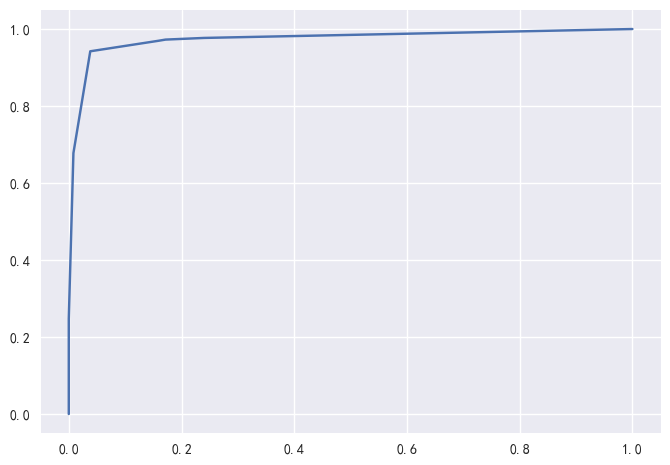

In [20]:
plt.plot(fpr,tpr);

In [16]:
#模型预测效果评估
from sklearn.metrics import roc_curve
fpr,tpr,th=roc_curve(y_test,y_pred_proba[:,1])
# a["阈值"]=list(th)
# a["警报率"]=list(fpr)
# a["命中率"]=list(tpr)

In [31]:
#概率
y_pred_proba=model.predict_proba(X_test)
b=pd.DataFrame(y_pred_proba,columns=["不离职概率","离职概率"])
y_pred_proba

array([[0.81818182, 0.18181818],
       [0.99234916, 0.00765084],
       [0.02463768, 0.97536232],
       ...,
       [0.97142857, 0.02857143],
       [0.00490196, 0.99509804],
       [0.99234916, 0.00765084]])

In [14]:
#查看整体的预测效果 准确率
model.score(X_test,y_test)

0.9573333333333334

In [13]:
#通过构造DataFrame进行对比
a=pd.DataFrame()
a["预测值"]=list(y_pred)
a["实际值"]=list(y_test)
a.head()

,预测值,实际值
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [12]:
#模型的预测和评估
#直接预测是否离职
y_pred=model.predict(X_test)
print(y_pred[0:100])

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0]


In [7]:
#模型的训练和搭建
from sklearn.tree import DecisionTreeClassifier
#实例化
model=DecisionTreeClassifier(max_depth=3,random_state=123)
model.fit(X_train,y_train)
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=3, random_state=123)

0.9573333333333334

In [6]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [5]:
# 提取特征变量和目标变量
X=df.drop(columns="离职")
y=df["离职"]

In [4]:
df=df.replace({"工资":{"低":0,"中":1,"高":2}})

In [6]:
df["离职"].value_counts()

0    11428
1     3572
Name: 离职, dtype: int64

In [3]:
df=pd.read_excel("员工离职预测模型.xlsx")
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,低,3.8,0.53,2,157,3,1
1,中,8.0,0.86,5,262,6,1
2,中,1.1,0.88,7,272,4,1
3,低,7.2,0.87,5,223,5,1
4,低,3.7,0.52,2,159,3,1


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\机器学习')